<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Découverte-du-Dataset" data-toc-modified-id="Découverte-du-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Découverte du Dataset</a></span><ul class="toc-item"><li><span><a href="#Rapide-aperçu" data-toc-modified-id="Rapide-aperçu-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rapide aperçu</a></span></li><li><span><a href="#Structure-interne" data-toc-modified-id="Structure-interne-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Structure interne</a></span></li></ul></li><li><span><a href="#Nettoyage-des-données" data-toc-modified-id="Nettoyage-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nettoyage des données</a></span><ul class="toc-item"><li><span><a href="#Prédictions-et-régions/continents" data-toc-modified-id="Prédictions-et-régions/continents-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prédictions et régions/continents</a></span></li><li><span><a href="#Sélection-d'indicateurs-pertinents" data-toc-modified-id="Sélection-d'indicateurs-pertinents-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sélection d'indicateurs pertinents</a></span></li><li><span><a href="#Valeurs-manquantes" data-toc-modified-id="Valeurs-manquantes-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Valeurs manquantes</a></span></li><li><span><a href="#Applications-de-filtres" data-toc-modified-id="Applications-de-filtres-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Applications de filtres</a></span></li><li><span><a href="#Construction-d'un-nouveau-dataset" data-toc-modified-id="Construction-d'un-nouveau-dataset-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Construction d'un nouveau dataset</a></span></li></ul></li><li><span><a href="#Visualisation-des-données" data-toc-modified-id="Visualisation-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualisation des données</a></span><ul class="toc-item"><li><span><a href="#Analyse-des-outliers" data-toc-modified-id="Analyse-des-outliers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Analyse des outliers</a></span></li><li><span><a href="#Distributions-des-indicateurs" data-toc-modified-id="Distributions-des-indicateurs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distributions des indicateurs</a></span></li><li><span><a href="#Classement-par-indicateur" data-toc-modified-id="Classement-par-indicateur-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Classement par indicateur</a></span></li></ul></li><li><span><a href="#Scoring-des-pays" data-toc-modified-id="Scoring-des-pays-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scoring des pays</a></span><ul class="toc-item"><li><span><a href="#Calcul-du-score" data-toc-modified-id="Calcul-du-score-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Calcul du score</a></span></li><li><span><a href="#Les-10-meilleurs-pays" data-toc-modified-id="Les-10-meilleurs-pays-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Les 10 meilleurs pays</a></span></li><li><span><a href="#Séries-temporelles" data-toc-modified-id="Séries-temporelles-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Séries temporelles</a></span></li></ul></li></ul></div>

# Découverte du Dataset

## Rapide aperçu

Les données proviennent du [site de la banque mondiale](https://datacatalog.worldbank.org/search/dataset/0038480).

Il y avait 5 fichiers CSV :
- **EdStatsCountry** : informations sur la collecte des données pour les différents pays.
- **EdStatsCountry-Series** : association entre les clés "country" et les clés "series" dans la base de données.
- **EdStatsData** : mesures et prédictions annuelles de divers indicateurs (plusieurs milliers) pour chaque pays.
- **EdStatsFootNote** : notes complémentaires.
- **EdStatsSeries** : données sur des séries statistiques.

Le fichier qui nous intéresse est **EdStatsData**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = pd.read_csv("csv/EdStatsData.csv")
data.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
519647,"Macao SAR, China",MAC,SACMEQ: Female 6th grade students by reading p...,LO.SACMEQ.REA.L5.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2485,Arab World,ARB,"Population, ages 15-64, male",SP.POP.1564.MA.IN,31910513.0,32804153.0,33728266.0,34704598.0,35762273.0,36920931.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221901,Canada,CAN,Percentage of repeaters in Grade 7 of primary ...,UIS.REPP.1.G7.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524447,Madagascar,MDG,Barro-Lee: Percentage of female population age...,BAR.TER.ICMP.6064.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64823,Middle income,MIC,"Population, ages 7-11, male",SP.POP.0711.MA.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
print("Dataset shape :", data.shape)

Dataset shape : (886930, 69)


## Structure interne

In [40]:
print("\nNoms des colonnes :")
print(data.columns.tolist())


Noms des colonnes :
['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']


In [3]:
data["Unnamed: 69"].unique()

array([nan])

In [4]:
data = data.drop(columns = ["Unnamed: 69"])

In [5]:
print("Nombre de pays :", data["Country Code"].nunique(), "\n")

Nombre de pays : 242 



In [6]:
france = data[data["Country Code"] == "FRA"]
print("France shape :", france.shape)

france_indicators = france["Indicator Code"].unique()
print("Nombre d'indicateurs de la France :", france_indicators.shape[0])

France shape : (3665, 69)
Nombre d'indicateurs de la France : 3665


In [7]:
indicators_by_country = data.groupby("Country Code")["Indicator Code"].unique()
same_indicators = indicators_by_country.apply(lambda x: (x == france_indicators).all())
print("Nombre de pays ayant la même liste d'indicateurs que la France :", same_indicators.shape[0])

Nombre de pays ayant la même liste d'indicateurs que la France : 242


**<span style="font-size:20px;">Conclusion :</span>**

Le dataset contient 3665 lignes pour chacun des 242 pays étudiés :
- Une colonne pour le nom du pays (ex : France).
- Une colonne pour le code du pays, formé trois lettres majuscules (ex : FRA).

Chacune de ces 3665 lignes correspond à un indicateur :
- Une colonne pour le nom de l'indicateur.
- Une colonne pour le code de l'indicateur.

Les autres colonnes contiennent les valeurs annuelles de ces indicateurs :
- Une colonne par année de 1970 à 2017 qui correspondent à des mesures.
- Une colonne tous les 5 ans de 2020 à 2100 qui correspondent à des prédictions.

Il y a donc un total de 69 colonnes.

# Nettoyage des données

## Prédictions et régions/continents

On écarte les années à partir de 2020 car elles correspondent à des prédictions

In [8]:
df = data.drop(columns = [str(year) for year in range(2020, 2101, 5)])

On écarte les premières lignes car elles correspondent à des régions du monde et non pas des pays

In [9]:
names = df["Country Name"].unique()
print(names.tolist())

['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union', 'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members', 'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World', 'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzego

In [10]:
first_country_index = np.argmax(names == "Afghanistan")
area_names = names[:first_country_index]
country_names = names[first_country_index:]

df = df[df["Country Name"].isin(country_names)]

print("Nombre de pays :", df["Country Name"].nunique(), "\n")

Nombre de pays : 217 



## Sélection d'indicateurs pertinents

- **[SP.POP.1524.TO.UN]** Population, ages 15-24, total (number)
- **[UIS.E.3]** Enrolment in upper secondary education, both sexes (number)
- **[SE.TER.ENRL]** Enrolment in tertiary education, all programmes, both sexes (number)
- **[IT.NET.USER.P2]** Internet users (per 100 people)
- **[IT.CMP.PCMP.P2]** Personal computers (per 100 people)
- **[NY.GDP.PCAP.PP.CD]** GNI per capita, PPP (current international dollar)
- **[OECD.TSAL.3.E0]** Annual statutory teacher salaries in public institutions in USD. Upper Secondary. Starting salary

Pour chacun de ces indicateurs, on récupère la dernière mesure effectuée dans chaque pays ainsi que l'année de cette mesure.

In [11]:
selected_indicators = ["SP.POP.1524.TO.UN", "UIS.E.3", "SE.TER.ENRL", "IT.NET.USER.P2", "IT.CMP.PCMP.P2", "NY.GDP.PCAP.PP.CD", "OECD.TSAL.3.E0"]

df = df[df["Indicator Code"].isin(selected_indicators)]

In [12]:
def last_non_missing_value(row) :

    for i in range(len(row) - 1, 4, -1):
        if not pd.isna(row[i]):
            return row[i], row.index[i]
        
    return np.nan, np.nan


df2 = df.copy()
df2[["Value", "Year"]] = df2.apply(last_non_missing_value, axis = 1, result_type = "expand")
df2 = df2.drop(columns = [str(year) for year in range(1970, 2018)])
df2.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Value,Year
761137,St. Martin (French part),MAF,"Population, ages 15-24, total",SP.POP.1524.TO.UN,NaN,NaN
334762,Finland,FIN,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,43365.070345,2016
767360,Sudan,SDN,Internet users (per 100 people),IT.NET.USER.P2,28.000000,2016
624425,Northern Mariana Islands,MNP,Internet users (per 100 people),IT.NET.USER.P2,0.000000,1990
779064,Sweden,SWE,Personal computers (per 100 people),IT.CMP.PCMP.P2,88.011928,2006
708720,Seychelles,SYC,Internet users (per 100 people),IT.NET.USER.P2,56.514708,2016
846762,United States,USA,Annual statutory teacher salaries in public in...,OECD.TSAL.3.E0,43677.700000,2015
158799,Belgium,BEL,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,504745.000000,2015
309235,El Salvador,SLV,Internet users (per 100 people),IT.NET.USER.P2,28.997073,2016
826000,Turks and Caicos Islands,TCA,Internet users (per 100 people),IT.NET.USER.P2,0.000000,1990


## Valeurs manquantes

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1519 entries, 91772 to 885747
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1519 non-null   object 
 1   Country Code    1519 non-null   object 
 2   Indicator Name  1519 non-null   object 
 3   Indicator Code  1519 non-null   object 
 4   Value           1241 non-null   float64
 5   Year            1241 non-null   object 
dtypes: float64(1), object(5)
memory usage: 83.1+ KB


<Axes: >

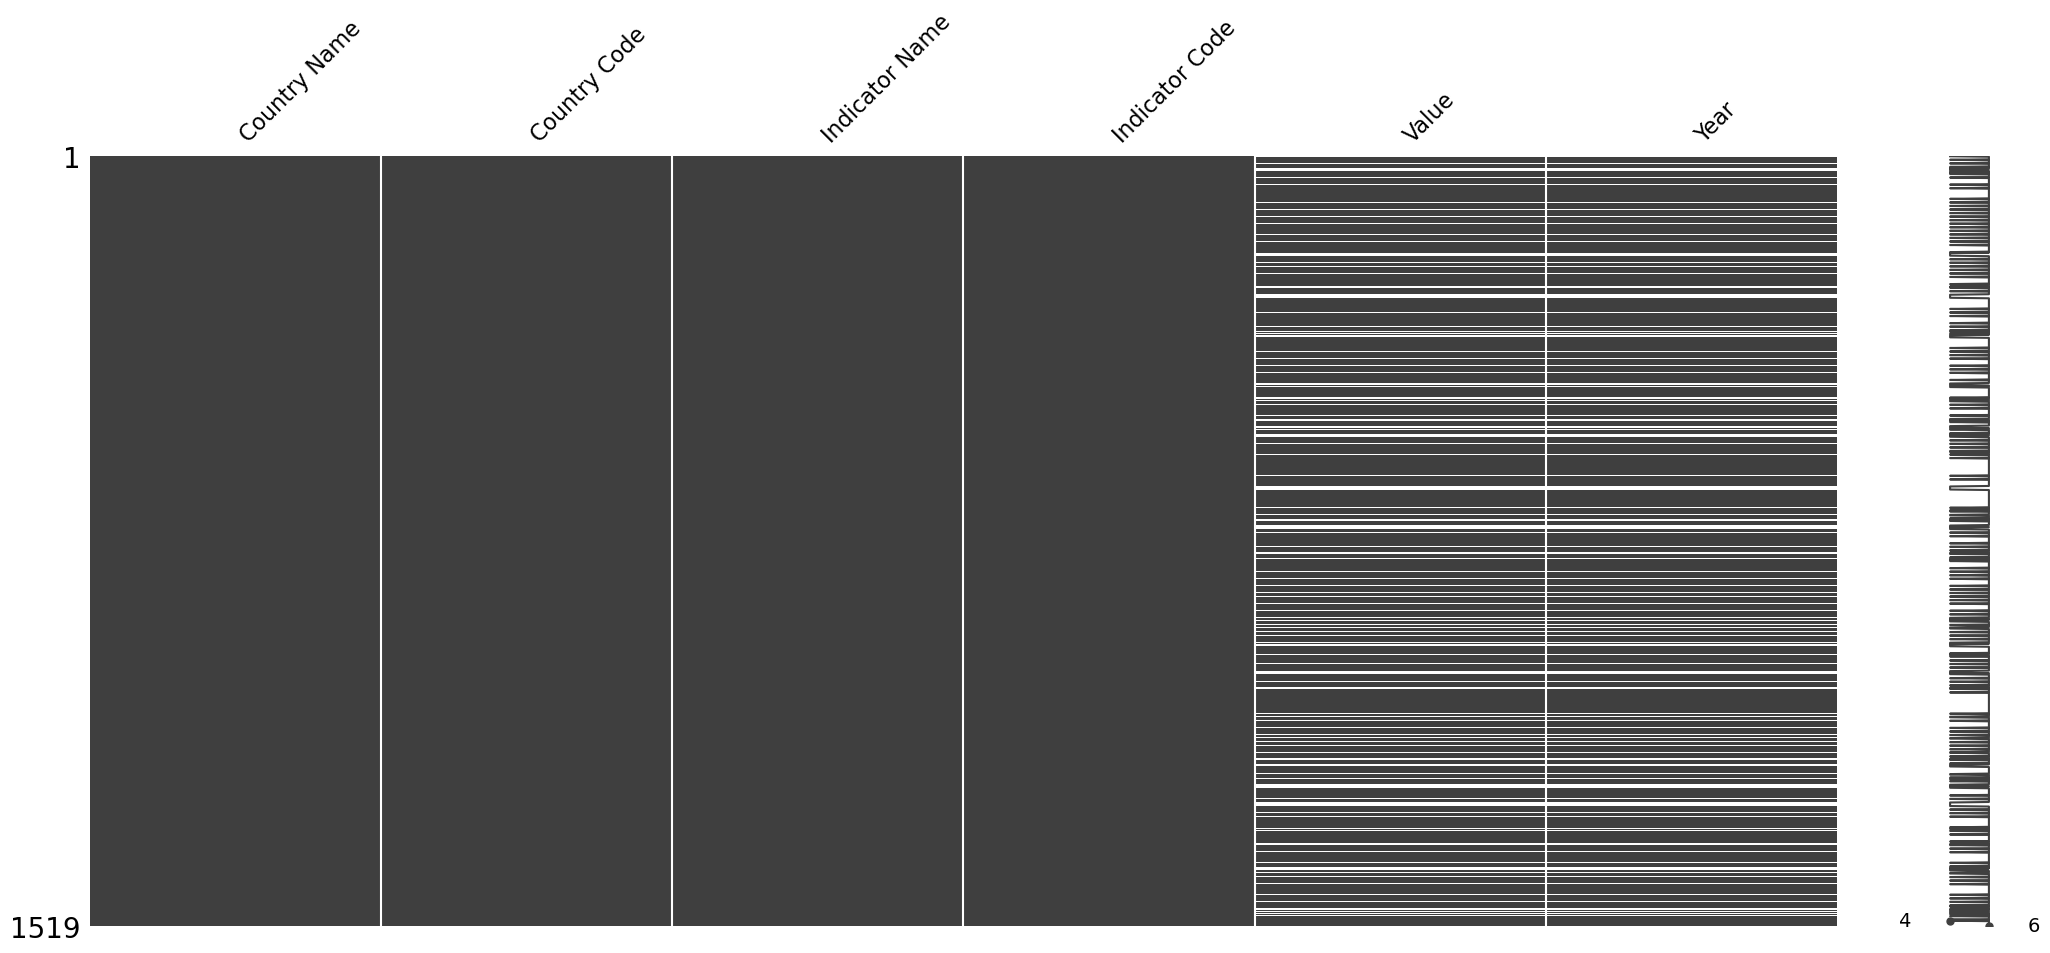

In [35]:
msno.matrix(df2)

In [36]:
def missing_percentage_by_indicator(df, selected_indicators) :
    
    missing_percentages = {}
    
    for indicator_code in selected_indicators:
        
        indicator_data = df[df["Indicator Code"] == indicator_code]
        percentage = (indicator_data["Value"].isna().mean()) * 100
        missing_percentages[indicator_code] = str(round(percentage, 2)) + " %"
        
    return pd.DataFrame(missing_percentages, index = ["Missing"])


missing_percentage_by_indicator(df2, selected_indicators)

,SP.POP.1524.TO.UN,UIS.E.3,SE.TER.ENRL,IT.NET.USER.P2,IT.CMP.PCMP.P2,NY.GDP.PCAP.PP.CD,OECD.TSAL.3.E0
Missing,11.52 %,7.83 %,6.45 %,4.15 %,11.06 %,11.52 %,75.58 %


## Applications de filtres

In [16]:
indicator_groups = df2.groupby("Indicator Code")["Value"]
indicator_groups.describe()

,count,mean,std,min,25%,50%,75%,max
Indicator Code,,,,,,,,
IT.CMP.PCMP.P2,193.0,1.712949e+01,2.219759e+01,0.022211,2.218116,7.867200e+00,2.096637e+01,9.617066e+01
IT.NET.USER.P2,208.0,5.040813e+01,2.905175e+01,0.000000,25.054978,5.321309e+01,7.612668e+01,9.824002e+01
NY.GDP.PCAP.PP.CD,192.0,2.025166e+04,2.178037e+04,700.063083,4008.266924,1.265736e+04,2.805176e+04,1.277280e+05
OECD.TSAL.3.E0,53.0,2.522872e+04,1.730804e+04,1924.944390,12741.815306,2.032000e+04,3.686740e+04,7.931157e+04
SE.TER.ENRL,203.0,1.045267e+06,4.116539e+06,194.000000,12546.000000,1.582620e+05,4.441515e+05,4.336739e+07
SP.POP.1524.TO.UN,192.0,6.274290e+06,2.338922e+07,2825.000000,294596.750000,1.158544e+06,4.519916e+06,2.441202e+08
UIS.E.3,200.0,1.234444e+06,5.146533e+06,353.000000,32984.750000,1.742580e+05,7.091480e+05,5.522868e+07


On filtre les indicateurs "SP.POP.1524.TO.UN", "SE.TER.ENRL" et "UIS.E.3" en se basant sur les valeurs des Q3.

In [17]:
def apply_treshold_filter(df, indicator_code, treshold) :

    filtered_countries = []
    
    for country_code in df["Country Code"].unique() :
        
        country_data = df[df["Country Code"] == country_code]
        value = country_data[country_data["Indicator Code"] == indicator_code]["Value"].iloc[0]
        
        if value > treshold :
            filtered_countries.append(country_code)
            
    return df[df["Country Code"].isin(filtered_countries)]

df3 = apply_treshold_filter(df2, "SP.POP.1524.TO.UN", 4500000)
df3 = apply_treshold_filter(df2, "SE.TER.ENRL", 440000)
df3 = apply_treshold_filter(df2, "UIS.E.3", 700000)

print("Pays restants :", len(df3) // len(selected_indicators))

Pays restants : 51


In [18]:
missing_percentage_by_indicator(df3, selected_indicators)

,SP.POP.1524.TO.UN,UIS.E.3,SE.TER.ENRL,IT.NET.USER.P2,IT.CMP.PCMP.P2,NY.GDP.PCAP.PP.CD,OECD.TSAL.3.E0
Missing,0.0 %,0.0 %,0.0 %,0.0 %,1.96 %,1.96 %,47.06 %


**Remarques :**
- L'indicateur "OECD.TSAL.3.E0" contient toujours trop de valeurs manquantes : on ne l'utilisera pas dans le scoring des pays.
- Les indicateurs "IT.CMP.PCMP.P2" et "NY.GDP.PCAP.PP.CD" en contiennent très peu : regardons de plus près.

In [19]:
df3[(df3["Indicator Code"] == "IT.CMP.PCMP.P2") & (df3["Value"].isna())]

,Country Name,Country Code,Indicator Name,Indicator Code,Value,Year
467539,"Korea, Dem. People’s Rep.",PRK,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN


In [20]:
df3[(df3["Indicator Code"] == "NY.GDP.PCAP.PP.CD") & (df3["Value"].isna())]

,Country Name,Country Code,Indicator Name,Indicator Code,Value,Year
466702,"Korea, Dem. People’s Rep.",PRK,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN


In [21]:
df4 = df3.drop(df3[df3["Country Code"] == "PRK"].index)

missing_percentage_by_indicator(df4, selected_indicators)

,SP.POP.1524.TO.UN,UIS.E.3,SE.TER.ENRL,IT.NET.USER.P2,IT.CMP.PCMP.P2,NY.GDP.PCAP.PP.CD,OECD.TSAL.3.E0
Missing,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,46.0 %


**Remarque :**
Il n'y avait en fait qu'une valeur manquante pour les indicateurs "IT.CMP.PCMP.P2" et "NY.GDP.PCAP.PP.CD", qui correspond à la Corée du Nord et qu'on choisit de l'écarter.

## Construction d'un nouveau dataset

In [22]:
series_dict = {}

for indicator_code in selected_indicators :
    filtered_data = df4[df4["Indicator Code"] == indicator_code]
    series = filtered_data.set_index("Country Name")["Value"]
    series_dict[indicator_code] = series

df5 = pd.concat(series_dict, axis = 1)
df5.columns = ["Population 15-24", "Secondary", "Tertiary", "Internet", "Computer", "GNI per capita", "Teacher"]

df6 = df5.drop("Teacher", axis = 1)
df6.sample(5)

,Population 15-24,Secondary,Tertiary,Internet,Computer,GNI per capita
Country Name,,,,,,
South Africa,9998431.0,2971802.0,1018543.0,54.000000,8.222196,13247.643494
Nigeria,36659023.0,4046541.0,1513371.0,25.670000,0.859686,5872.468027
Turkey,13930222.0,4995623.0,6062886.0,58.347734,6.411533,24412.462558
Peru,5653743.0,981455.0,1150620.0,45.461741,10.099815,13043.882165
Algeria,6467818.0,1332584.0,1289474.0,42.945527,1.030597,15042.442301


# Visualisation des données

## Analyse des outliers

In [23]:
def custom_describe(df) :
    
    stats = pd.DataFrame(index = df6.columns)

    stats["Moyenne"] = df6.mean()
    stats["Ecart-type"] = df6.std()
    stats["Min"] = df6.min()
    stats["Q1"] = df6.quantile(0.25)
    stats["Mediane"] = df6.median()
    stats["Q3"] = df6.quantile(0.75)
    stats["Max"] = df6.max()
    
    pd.set_option('display.float_format', '{:.0f}'.format)
    return stats

custom_describe(df6)

,Moyenne,Ecart-type,Min,Q1,Mediane,Q3,Max
Population 15-24,19881308,43081716,1241946,5369459,7296862,14479044,244120201
Secondary,4464835,9657572,701984,995646,1670596,3610742,55228676
Tertiary,3790861,7710860,167983,678680,1769428,2950698,43367392
Internet,55,25,6,33,57,76,95
Computer,21,27,0,3,10,33,94
GNI per capita,21023,16239,804,7824,16253,33794,57638


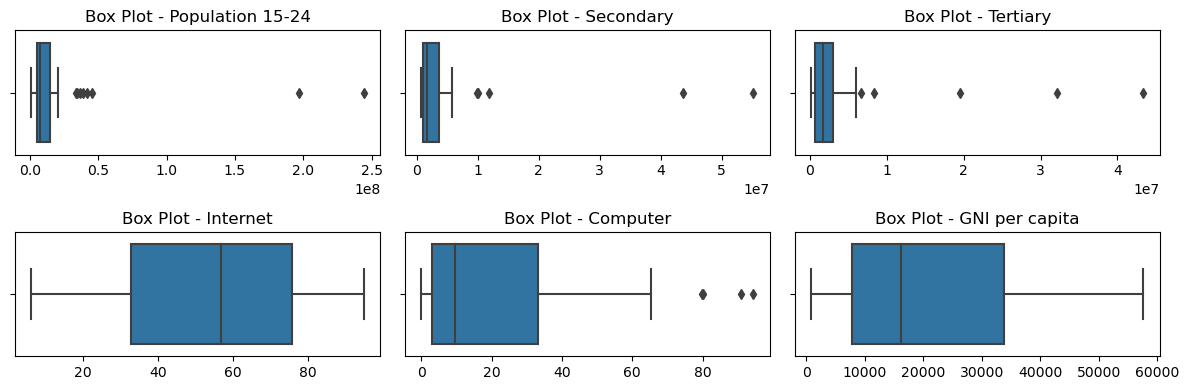

In [24]:
def plot_boxplots(df) :

    plt.figure(figsize = (12, 4))
    
    for i, feature in enumerate(df.columns):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(x = df[feature])
        plt.title(f"Box Plot - {feature}")
        plt.gca().invert_yaxis()
        plt.xlabel('')
    
    plt.tight_layout()
    plt.show()
    
plot_boxplots(df6)

On constate la présence d'outliers pour les indicateurs "Population 15-24", "Secondary" et "Tertiary".

In [25]:
df6.loc[df6["Population 15-24"] > 0.5e8]

,Population 15-24,Secondary,Tertiary,Internet,Computer,GNI per capita
Country Name,,,,,,
China,197026759,43709224,43367392,53,6,15559
India,244120201,55228676,32107420,30,3,6583


In [26]:
df6.loc[df6["Secondary"] > 1.5e7]

,Population 15-24,Secondary,Tertiary,Internet,Computer,GNI per capita
Country Name,,,,,,
China,197026759,43709224,43367392,53,6,15559
India,244120201,55228676,32107420,30,3,6583


In [27]:
df6.loc[df6["Tertiary"] > 1.5e7]

,Population 15-24,Secondary,Tertiary,Internet,Computer,GNI per capita
Country Name,,,,,,
China,197026759,43709224,43367392,53,6,15559
India,244120201,55228676,32107420,30,3,6583
United States,45147517,11736315,19531728,76,80,57638


**Conclusion :**

Ces outliers ne sont pas des valeurs aberrantes.<br>
La Chine et l'Inde sont deux pays à très forte population, mais aussi à très fortes inégalités.<br>
On choisit de les laisser tomber, mais il pourra être intéressant d'étudier leur cas séparément.

In [28]:
df7 = df6.drop(["China", "India"])

## Distributions des indicateurs

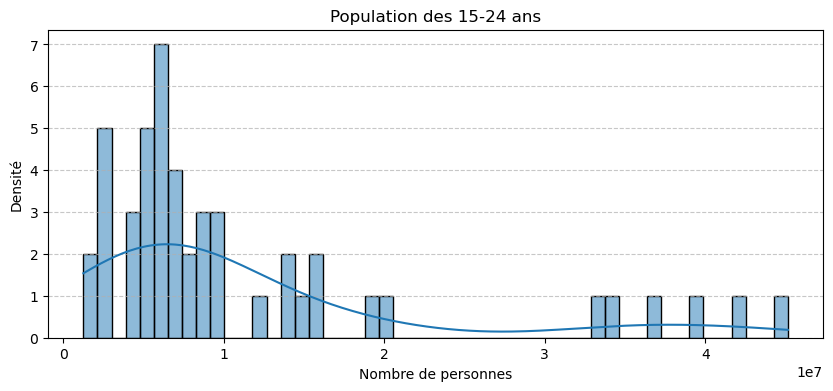

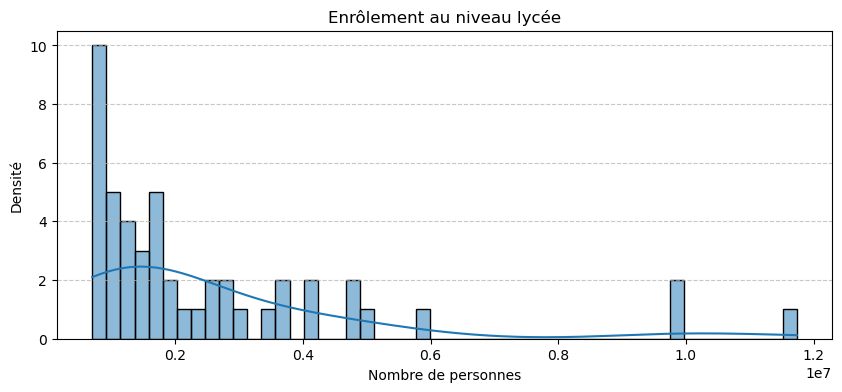

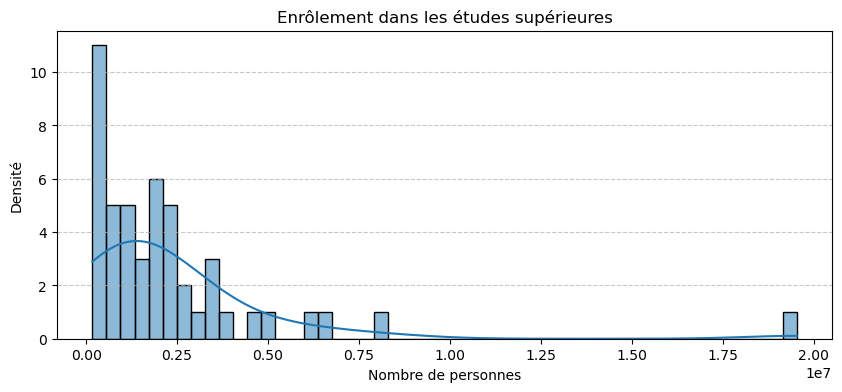

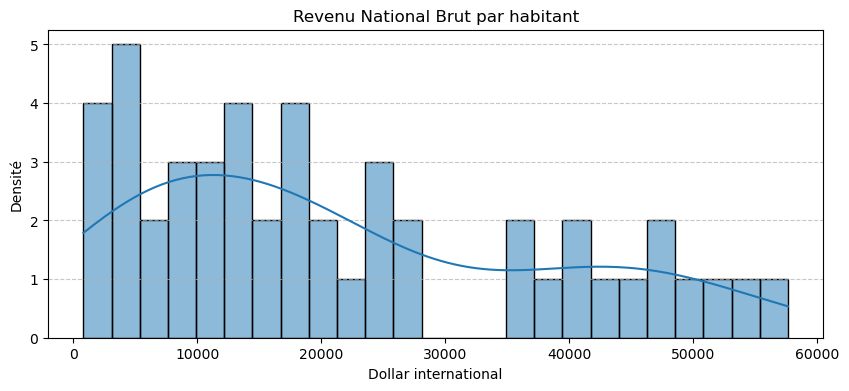

In [29]:
def plot_density(df, feature, title, legend, bins = 50) :
    plt.figure(figsize = (10, 4))
    sns.histplot(df[feature], bins = bins, kde = True)
    plt.title(title)
    plt.xlabel(legend)
    plt.ylabel("Densité")
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.show()

plot_density(df7, "Population 15-24", "Population des 15-24 ans", "Nombre de personnes")
plot_density(df7, "Secondary", "Enrôlement au niveau lycée", "Nombre de personnes")
plot_density(df7, "Tertiary", "Enrôlement dans les études supérieures", "Nombre de personnes")
plot_density(df7, "GNI per capita", "Revenu National Brut par habitant", "Dollar international", bins = 25)

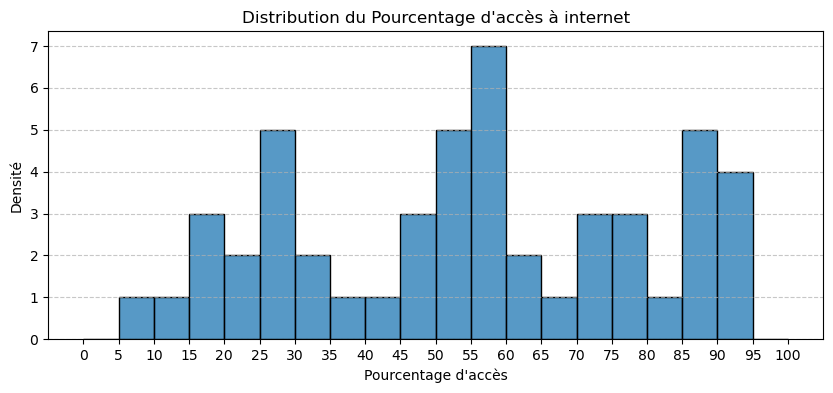

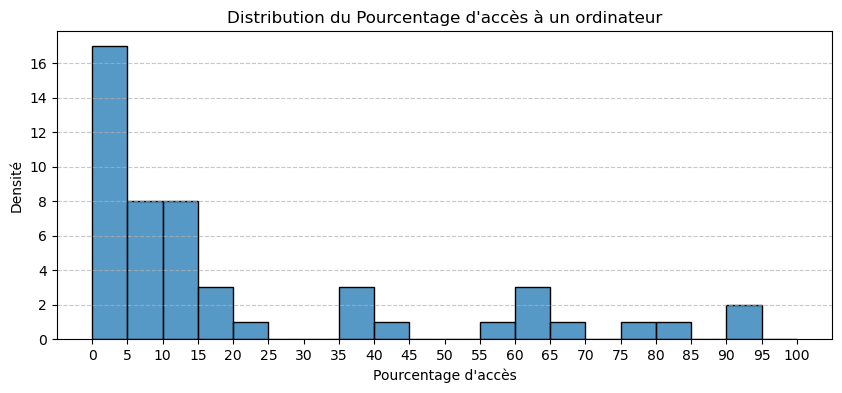

In [30]:
def plot_access_percentage(df, feature, name) :
    plt.figure(figsize = (10, 4))
    bins = [i for i in range(0, 101, 5)]
    sns.histplot(df[feature], bins = bins)
    plt.title(f"Distribution du {name}")
    plt.xlabel("Pourcentage d'accès")
    plt.ylabel("Densité")
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.xticks(range(0, 101, 5))
    plt.show()

plot_access_percentage(df6, "Internet", "Pourcentage d'accès à internet")
plot_access_percentage(df6, "Computer", "Pourcentage d'accès à un ordinateur")

## Classement par indicateur

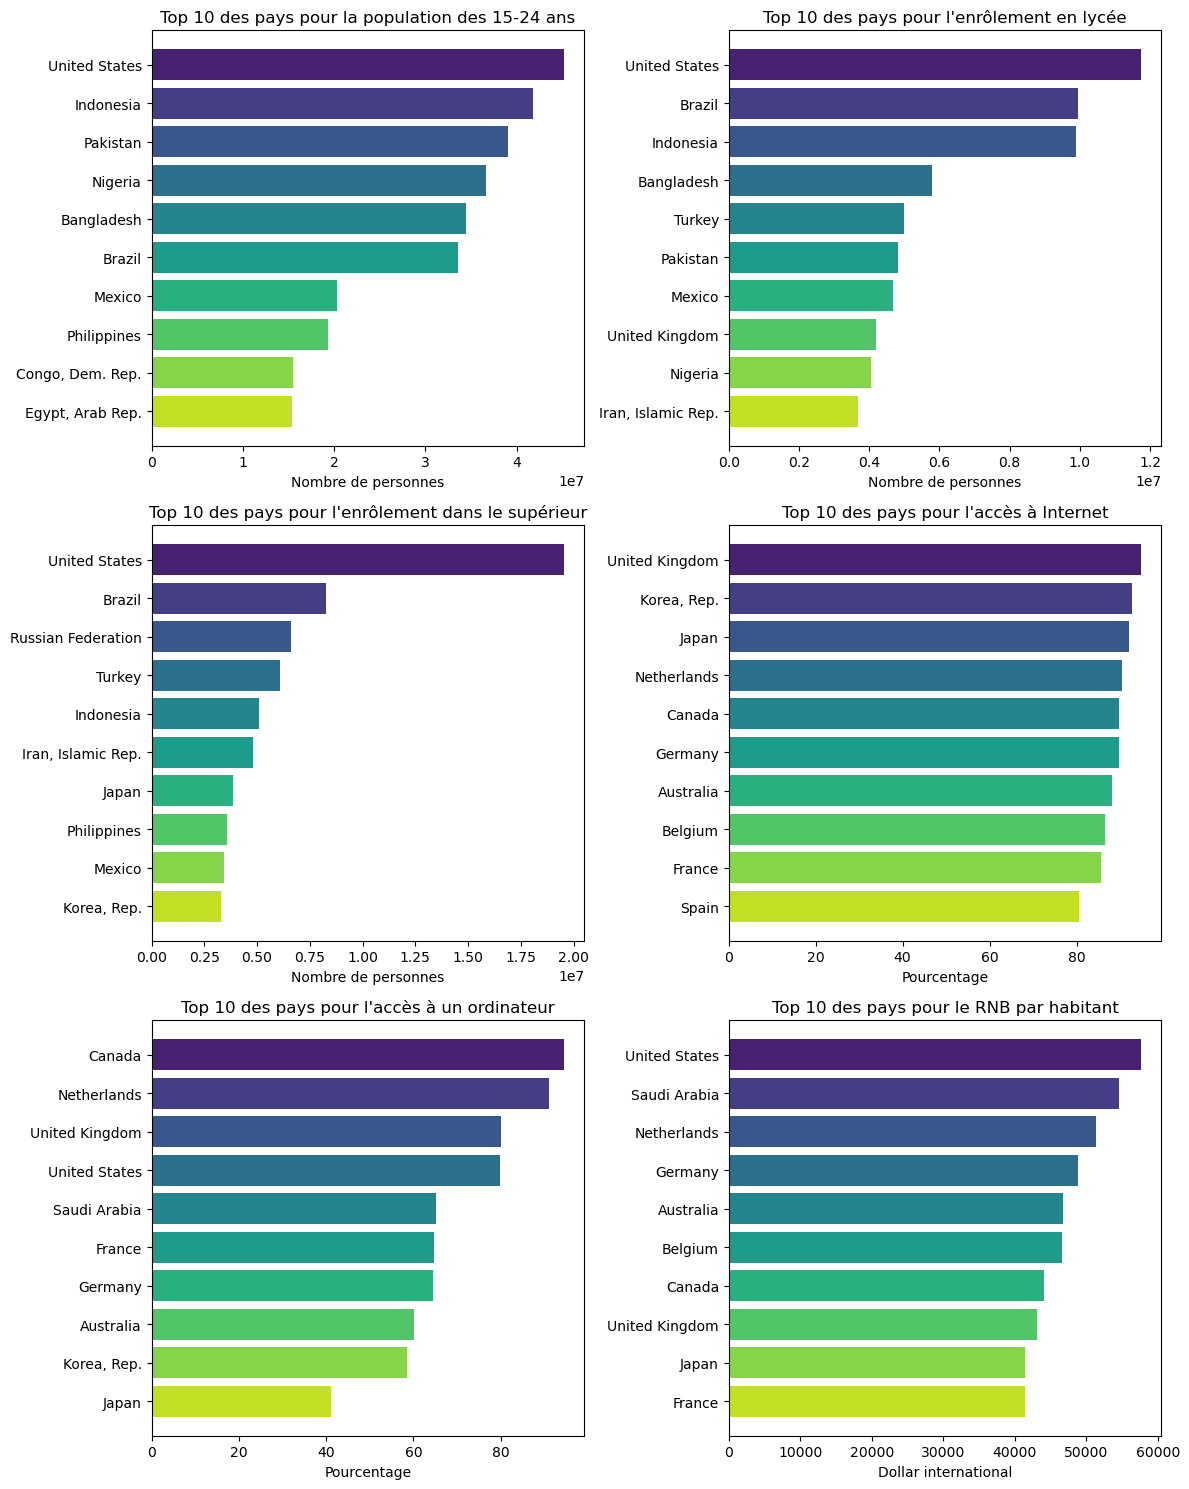

In [31]:
def horizontal_barplot(df, feature, ax, nb_bars, title, legend) :  
    sorted_df = df.sort_values(by = feature, ascending = False)
    top_df = sorted_df.head(nb_bars)
    ax.barh(top_df.index, top_df[feature], color = sns.color_palette("viridis", nb_bars))
    ax.set_title(f"Top {nb_bars} des pays pour {title}")
    ax.set_xlabel(legend)
    ax.invert_yaxis()

fig, axes = plt.subplots(3, 2, figsize = (12, 15))

horizontal_barplot(df7, "Population 15-24", axes[0, 0], 10, "la population des 15-24 ans", "Nombre de personnes")
horizontal_barplot(df7, "Secondary", axes[0, 1], 10, "l'enrôlement en lycée", "Nombre de personnes")
horizontal_barplot(df7, "Tertiary", axes[1, 0], 10, "l'enrôlement dans le supérieur", "Nombre de personnes")
horizontal_barplot(df7, "Internet", axes[1, 1], 10, "l'accès à Internet", "Pourcentage")
horizontal_barplot(df7, "Computer", axes[2, 0], 10, "l'accès à un ordinateur", "Pourcentage")
horizontal_barplot(df7, "GNI per capita", axes[2, 1], 10, "le RNB par habitant", "Dollar international")

plt.tight_layout()
plt.show()

# Scoring des pays

## Calcul du score

Pour chacun des 6 indicateurs, on regarde les 10 meilleurs pays et on leur attribue des points (de 10 à 1).<br>
On calcule ensuite la somme des ces points pondérée par des coefficients de notre choix (ici 1, 1, 1, 3, 2, 1).<br>
On affiche enfin les 10 pays ayant obtenus les meilleurs scores.

In [44]:
def compute_score(df, weights, top = 10) :
    
    df["Score"] = 0
    
    for feature, weight in weights.items() :
        sorted_df = df.sort_values(by = feature, ascending = False)
        top_10_index = sorted_df.index[:10]
        for i, index in enumerate(top_10_index) :
            df.loc[index, "Score"] += (10 - i) * weight
            
    df.sort_values(by = "Score", ascending = False, inplace = True)
    return df.head(top)

weights = {"Population 15-24": 1, "Secondary": 1, "Tertiary": 1, "Internet": 3, "Computer": 2, "GNI per capita": 1}
top_10 = compute_score(df7.copy(), weights)

## Les 10 meilleurs pays

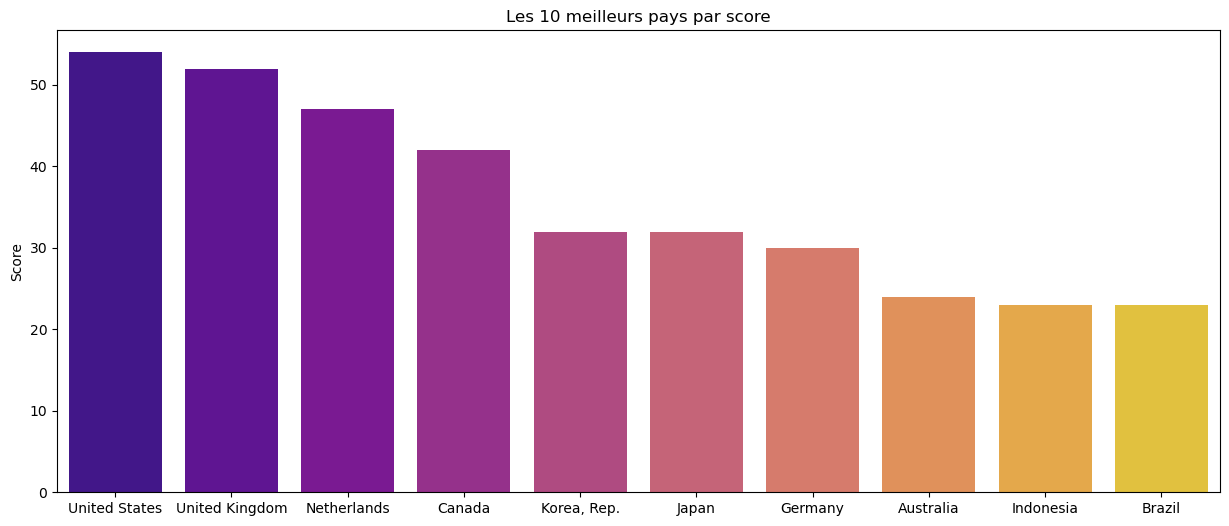

In [46]:
plt.figure(figsize = (15, 6))
sns.barplot(x = "Country Name", y = "Score", data = top_10.reset_index(), palette = "plasma")
plt.xlabel("")
plt.ylabel("Score")
plt.title("Les 10 meilleurs pays par score")
plt.show()

In [47]:
top_10

,Population 15-24,Secondary,Tertiary,Internet,Computer,GNI per capita,Score
Country Name,,,,,,,
United States,45147517,11736315,19531728,76,80,57638,54
United Kingdom,7731522,4195082,2352933,95,80,43081,52
Netherlands,2005912,746415,842601,90,91,51320,47
Canada,4373511,1531393,1212161,90,94,44025,42
"Korea, Rep.",6456561,1903857,3268099,93,59,35751,32
Japan,12157426,3682920,3862460,92,41,41476,32
Germany,8682394,2579952,2977781,90,64,48885,30
Australia,2914620,1104162,1453521,88,60,46790,24
Indonesia,41819264,9902660,5107999,25,2,11632,23


## Séries temporelles

On se propose, en guise de conclusion, d'afficher les données annuelles du dataset originel pour les 5 meilleurs pays.

In [130]:
def plot_time_series(df, countries, colors, indicator, name, unit, first_year, last_year) :

    plt.figure(figsize = (12, 3))
    years = [str(year) for year in range(first_year, last_year + 1)]

    for i in range(len(countries)) :
        country_df = df[(df["Country Name"] == countries[i]) & (df["Indicator Code"] == indicator)]
        values = country_df[years].values[0]
        plt.plot(years, values, marker = "o", linestyle = "-", label = countries[i], color = colors[i])

    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1), frameon = True)
    plt.xlabel("Année")
    plt.ylabel(unit)
    plt.title(f"{name} de {first_year} à {last_year} par pays")
    plt.xticks(years, rotation = 45)
    plt.grid(True, alpha = 0.5)

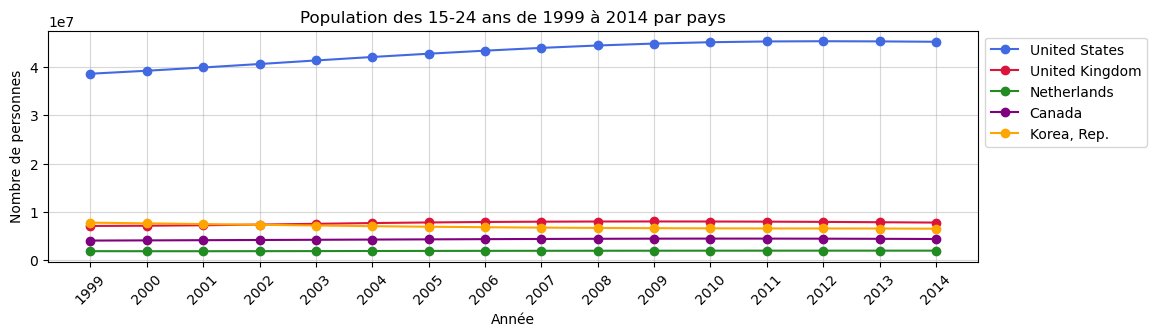

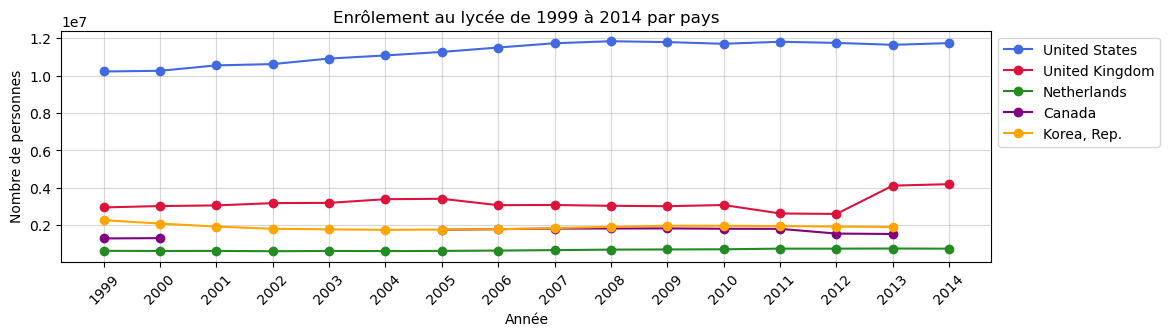

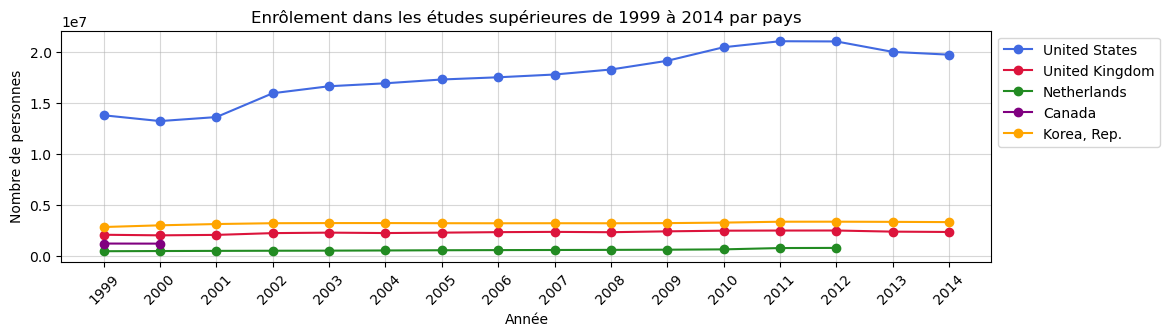

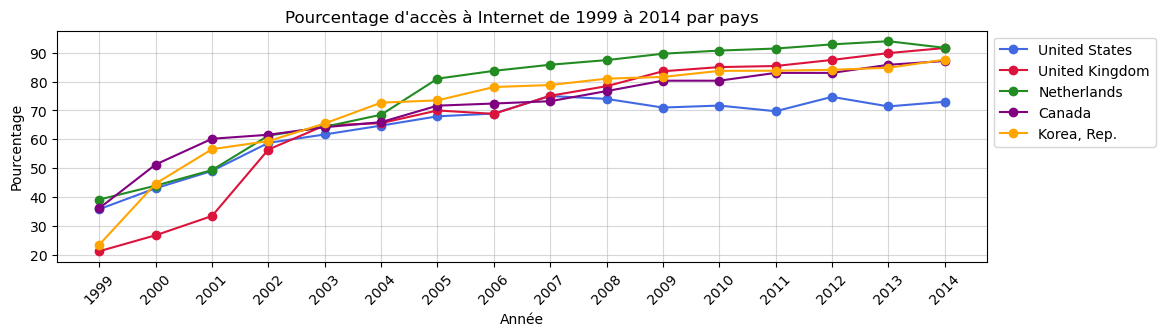

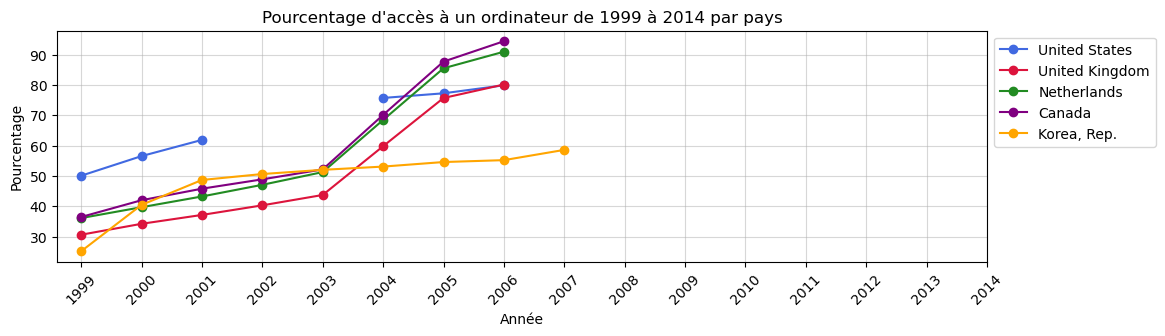

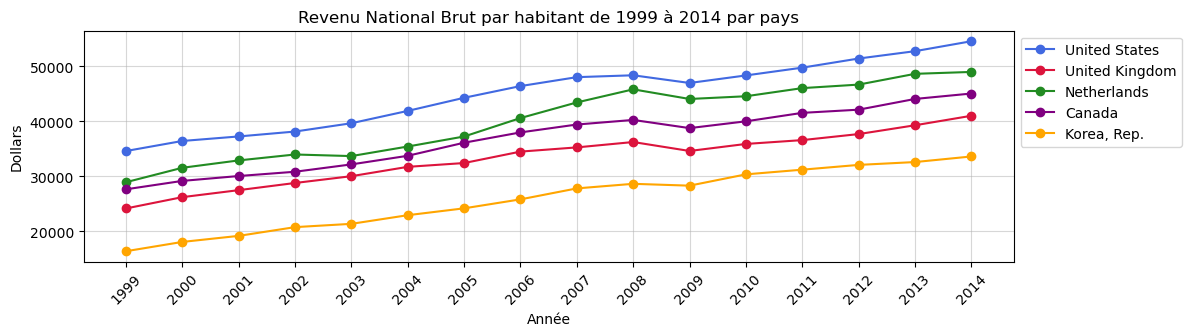

In [132]:
indicators = ["SP.POP.1524.TO.UN", "UIS.E.3", "SE.TER.ENRL", "IT.NET.USER.P2", "IT.CMP.PCMP.P2", "NY.GDP.PCAP.PP.CD"]

names = ["Population des 15-24 ans", "Enrôlement au lycée", "Enrôlement dans les études supérieures",
         "Pourcentage d'accès à Internet", "Pourcentage d'accès à un ordinateur", "Revenu National Brut par habitant"]

units = ["Nombre de personnes", "Nombre de personnes", "Nombre de personnes", "Pourcentage", "Pourcentage", "Dollars"]

top_5 = ["United States", "United Kingdom", "Netherlands", "Canada", "Korea, Rep."]
colors = ["royalblue", "crimson", "forestgreen", "purple", "orange"]

for i in range(len(indicators)) :
    plot_time_series(data, top_5, colors, indicators[i], names[i], units[i], 1999, 2014)